# <center>Análise de Ranking de Filmes</center>
Base de dados de filmes, no qual consta os usuários, os filmes que cada um avaliou e qual foi a nota atribuída àquele filme.

O objetivo é fazer uma apresentação desses dados através de tabelas e gráficos e após isso criar um ranking a partir das notas atribuídas aos filmes.

### Importação
Importação da biblioteca "numpy" para trabalhar com operações de vetores e matrizes.  
Importação da biblioteca "pandas" para visualização dos dados em forma de tabelas.  
Importação da biblioteca "matplotlib" para poder plotar gráficos.

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Leitura Arquivo De Entrada: Descobrindo Tamanho dos Dados
Descobrindo o tamanho da matriz a ser criada (considerando uma aplicação mais geral).  
Caso a base de dados esteja ordenada, é possível fazer essa parte sem uso de código, apenas uma análise no arquivo de entrada.

In [26]:
ref_arquivo = open("dados.txt","r")
qtd_filmes = 0
qtd_usuarios = 0
for linha in ref_arquivo:
    valores = linha.split(",")
    filme = int(valores[1])
    if (filme <= 2000):
        usuario = int(valores[0])
        if (qtd_filmes < filme):
            qtd_filmes = filme
        if (qtd_usuarios < usuario):
            qtd_usuarios = usuario
ref_arquivo.close()

### Leitura Arquivo de Entrada: Criação da Matriz
Utilização da biblioteca numpy para criar a matriz com valores zeros em todas as células.  
Vetor será usado para plotagem dos gráficos e tabelas.

In [29]:
ref_arquivo = open("dados.txt","r")
vetor = []
Matriz = np.zeros((qtd_usuarios,qtd_filmes), dtype = np.int32)
for linha in ref_arquivo: # Monta a matriz com as notas
    valores = linha.split(",")
    usuario = int(valores[0])
    filme = int(valores[1])
    if (filme <= 2000):
        nota = float(valores[2])
        vetor.append(nota)
        Matriz[usuario-1][filme-1] = nota
ref_arquivo.close()

Frequencia indica a quantidade de vezes que a nota apareceu.  
O vetor "valor" irá guardar as notas sem repetições.

In [30]:
vetor_ordenado = sorted(vetor)
ultimo = vetor_ordenado[0]
soma = 1
frequencia = []
valor = []
for valores in vetor_ordenado:
    if ultimo != valores:
        valor.append(ultimo)
        frequencia.append(soma)
        ultimo = valores
        soma = 1
    else:
        soma += 1

### Plotagem do Gráfico e Tabela

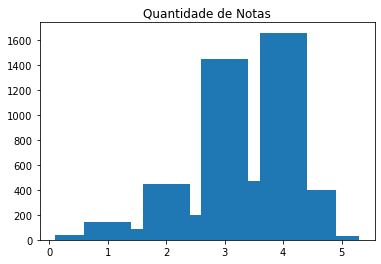

In [43]:
plt.bar(valor, frequencia)
plt.title("Quantidade de Notas")
plt.show()

In [49]:
i = 0
data = []
while i < len(valor):
    dados = []
    dados.append(valor[i])
    dados.append(frequencia[i])
    data.append(dados)
    i += 1
pd.DataFrame(data, columns = ["Notas","Frequencia"])

,Notas,Frequencia
0,0.5,39
1,1.0,139
2,1.1,23
3,1.2,31
4,1.3,22
5,1.4,21
6,1.5,84
7,1.6,29
8,1.7,22
9,1.8,22


### Calculo da Média das Notas
A base para realizar o ranking é fazer a média das notas que cada filme recebeu.

In [53]:
media = np.zeros((qtd_filmes+1,3),dtype = np.float32)
i = 0
while i < qtd_usuarios:
    j = 0
    soma = 0
    contador = 0
    while j < qtd_filmes:
        if Matriz[i][j] != 0:
            media[j][1] += Matriz[i][j]
            media[j][2] += 1
        j += 1
    i += 1

i = 0
while i < qtd_filmes:
    media[i][0] = i
    if media[i][2] != 0:
        media[i][1] = media[i][1] / media[i][2]
    i += 1

###  Geração do Ranking

In [62]:
Ranking = sorted(media, key=lambda media: media[1], reverse = True)
i = 0
output = open("Ranking.txt","w", newline = "")
output.write("ID_Filme - Nota"+"\n")
while i < qtd_filmes:
    output.write(str(int(Ranking[i][0]))+" - "+str(Ranking[i][1]))
    output.write("\n")
    i += 1
    print(Ranking)output.close()